<a href="https://colab.research.google.com/github/alibouch/TensorFlow_FSA_21-22/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TRAVAIL A FAIRE** : Adaptez le code suivant pour TensorFlow 2.x

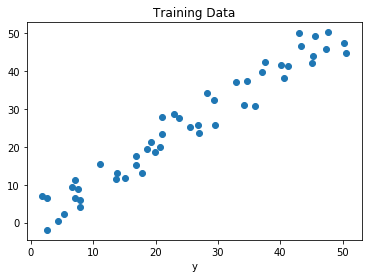

Epoch 50 : cost = 6.1328864 W = 0.96237415 b = 1.1804245
Epoch 100 : cost = 6.13118 W = 0.96270144 b = 1.1645337
Epoch 150 : cost = 6.129714 W = 0.9629961 b = 1.1502236
Epoch 200 : cost = 6.1284504 W = 0.9632616 b = 1.1373332
Epoch 250 : cost = 6.1273584 W = 0.9635007 b = 1.1257249
Epoch 300 : cost = 6.1264133 W = 0.9637161 b = 1.1152686
Epoch 350 : cost = 6.1255918 W = 0.96391004 b = 1.1058489
Epoch 400 : cost = 6.1248765 W = 0.9640846 b = 1.0973737
Epoch 450 : cost = 6.1242547 W = 0.9642419 b = 1.0897335
Epoch 500 : cost = 6.1237097 W = 0.9643834 b = 1.082862
Epoch 550 : cost = 6.123231 W = 0.96451086 b = 1.0766758
Epoch 600 : cost = 6.1228113 W = 0.9646259 b = 1.0710917
Epoch 650 : cost = 6.122442 W = 0.96472937 b = 1.0660657
Epoch 700 : cost = 6.122116 W = 0.9648226 b = 1.0615419
Epoch 750 : cost = 6.1218305 W = 0.96490633 b = 1.0574721
Epoch 800 : cost = 6.121576 W = 0.9649819 b = 1.0538038
Epoch 850 : cost = 6.121349 W = 0.96505 b = 1.0505011
Epoch 900 : cost = 6.121149 W = 0.965

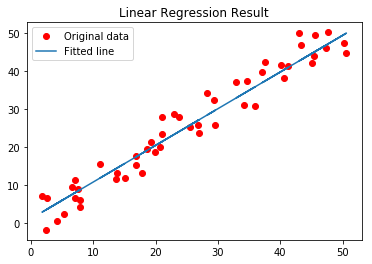

In [ ]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
#tf.enable_eager_execution()
#np.random.seed(101) 
#tf.set_random_seed(101) 

# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
n = len(x) # Number of data points 



# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 



X = tf.placeholder("float") 
Y = tf.placeholder("float") 


W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


learning_rate = 0.01
training_epochs = 1000


# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 

  
  # Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

